In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#import pysal as ps # Wczytanie danych z pliku dbf

## Klasyfikacja

Klasyfikacja zalicza się do metod uczenia nadzorowanego (ang. supervised learning). Zbiór (macierz) danych w tym przypadku składa się z obiektów charakteryzujących się atrybutami opisującymi i atrybutem decyzyjnym. Przyjmuje się przy tym, że pomiędzy atrybutami opisującymi, a atrybutem decyzyjnym zachodzi pewien związek przyczynowo-skutkowy zaś kategoryczny atrybut decyzyjny określa klasę do której przynależy obiekt. Zbiór danych jest traktowany jako źródło wiedzy na podstawie którego określa się rodzaj klasyfikatora, a następnie dobiera jego parametry w tzw. procesie uczenia. Gotowy klasyfikator może następnie zostać wykorzystany do określenia przynależności obiektu dla którego znane są jedynie wartości atrybutów opisujących do właściwej klasy. 

Z reguły w celu sprawdzenia poprawności danego algorytmu i sprawdzenia jego skuteczności dla danego zadania klasyfikacji podział zbioru danych wykonywany jest na zbiór uczący i testowy (najczęściej w proporcjach 80/20 lub 70/30). Czasem jednak w przypadku testowania algorytmów i ich dostrajania stosuje się podział 60/20/20, a poszczególne części stanową zbiory odpowiednio: treningowy, walidacyjny i testowy. 

W rozdziale tym skupimy się na następujących klasyfikacji SVM


Na końcu zaprezentowane zostaną metody łączenia wyników różnych klasyfikatorów (tzw. ensemblingu), w celu poprawy jakości klasyfikacji.


Wygenerujemy teraz nowy zbiór z klastrami bardziej się nakładającymi

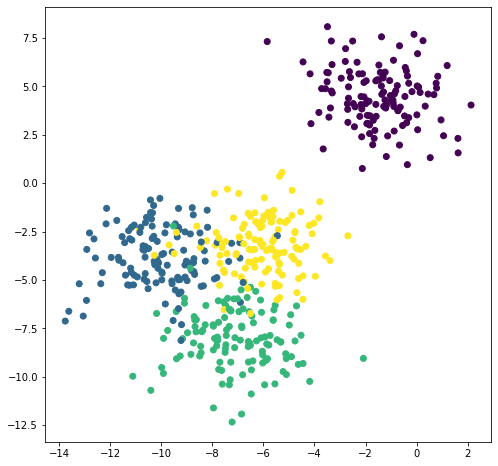

In [2]:
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

Miara $f_1 = 2*\frac{precyzja * czułość}{precyzja+czułość}$. 

Precyzja jest miarą wskazującą z jaką pewnością możemy ufać przewidywaniom pozytywnym: $precyzja = \frac{TP}{TP+FP}$  

Czułość jest miarą wskazującą w jakim procencie klasa faktycznie pozytywna została pokryta przewidywaniem pozytywnym: $czułość = \frac{TP}{TP+FN}$ 


### 2.4 SVM
Metoda wektorów nośnych/SVM z ang. Support Vector Machine jest algorytmem, którego zadaniem jest podzielenie przestrzeni cech przy pomocy wektorów nośnych. W przypadku 2 cech, które można zobrazować na wykresie płaskim, jest są to po proste (w przypadku jądra liniowego) lub wielomiany lub funkcja Gaussa (w przypadku jąder nieliniowych). Jądra liniowe są szybkie i proste w użyciu, jednakże nadają się do klasyfikacji obszarów wyraźnie od siebie odstających. W celu dokładnego wyodrębnienia obszarów należy użyć jąder nieliniowych, uważając na przeuczenie klasyfikatora.   

,feature1,feature2,label
0,-10.785289,1.728062,1
1,-6.342566,9.911338,0
2,-14.431693,-3.683509,1
3,10.389289,-6.023495,0
4,-4.118290,-5.106990,1
...,...,...,...
495,-13.098551,-3.460073,1
496,-3.288403,-10.189205,1
497,-10.095709,-7.254112,1
498,-6.396800,8.117403,0


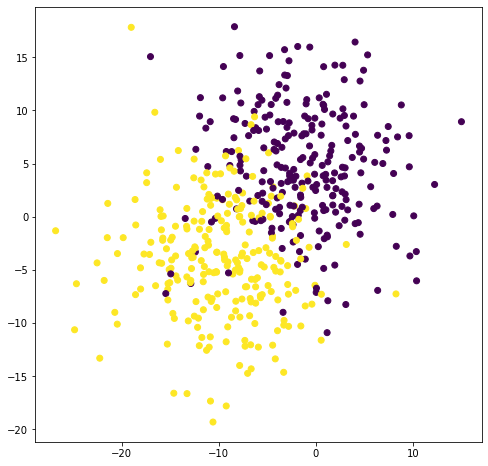

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=2,
                  cluster_std=5.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

dane3

c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


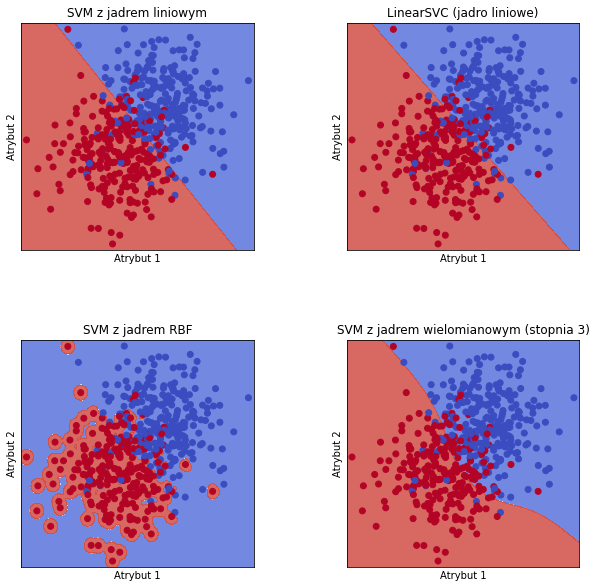

In [58]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(dane3[cechy], dane3['label'])
rbf_svc = svm.SVC(kernel='rbf', gamma=2).fit(dane3[cechy], dane3['label'])
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(dane3[cechy], dane3['label'])
lin_svc = svm.LinearSVC(C=C).fit(dane3[cechy], dane3['label'])

# create a mesh to plot in
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVM z jadrem liniowym',
          'LinearSVC (jadro liniowe)',
          'SVM z jadrem RBF',
          'SVM z jadrem wielomianowym (stopnia 3)']

plt.figure(figsize=(10,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## Liniowe SVM

W pakiecie sklearn dostępne są dwa linowe modele svm.SVC i svm.LinearSVC.

### Zadanie 1

Dla klasyfikatorów liniowego svm.SVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

In [18]:
from sklearn.metrics import roc_curve, auc

In [55]:
X_train, X_test, y_train, y_test = train_test_split(dane3[cechy], dane3['label'], test_size=0.2, random_state=0)
x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

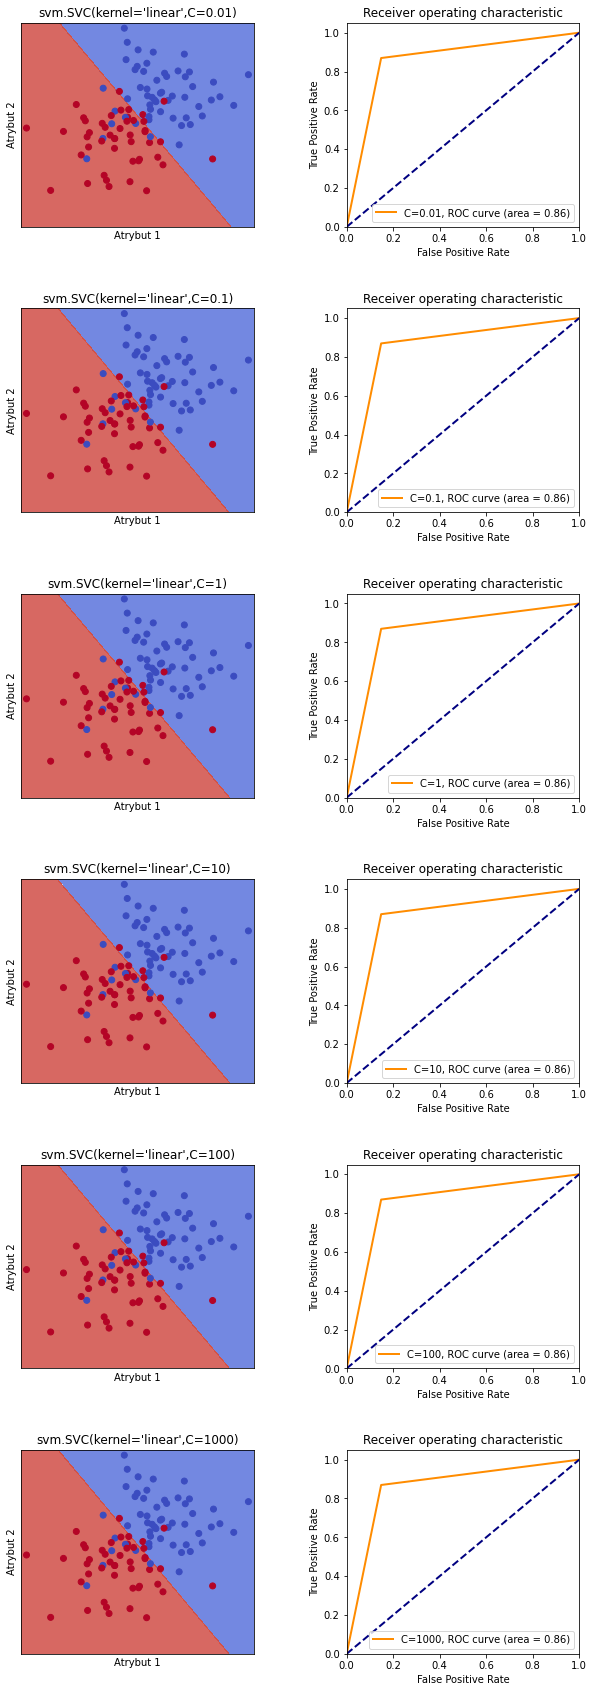

Text(0, 0.5, 'Powierzchnia krzywej ROC')

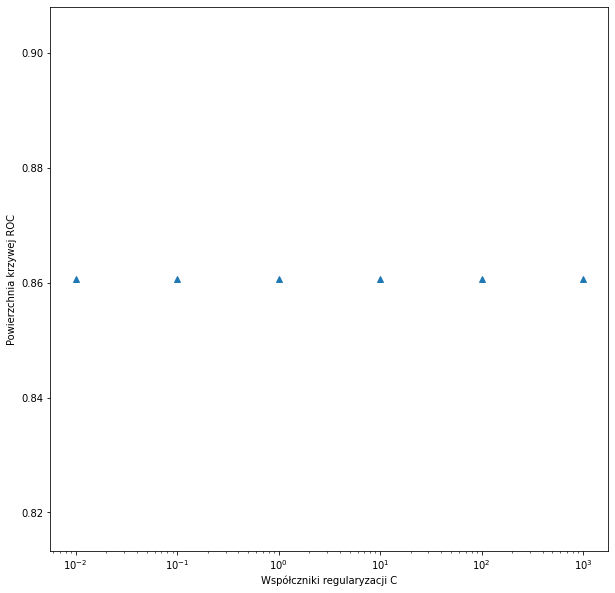

In [127]:
C_list = [0.01, 0.1, 1, 10, 100, 1000]
C_len = len(C_list)
roc_hist = np.empty(C_len)

plt.figure(figsize=(10,30))

for i, C in enumerate(C_list):
    classifier = svm.SVC(kernel='linear',C=C).fit(X_train, y_train)
    y_score = classifier.predict(X_test)
    
    plt.subplot(C_len, 2, 2*i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(f"svm.SVC(kernel='linear',C={C})")

    plt.subplot(C_len, 2, 2*i + 2)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(1):
        fpr[j], tpr[j], _ = roc_curve(y_test, y_score)
        roc_auc[j] = auc(fpr[j], tpr[j])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    lw = 2
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.plot(fpr[0], tpr[0], color='darkorange',
             lw=lw, label=f'C={C}, ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    roc_hist[i] = roc_auc[0]
    
plt.show()

plt.figure(figsize=(10,10))
plt.plot(C_list, roc_hist, '^')
plt.xscale('log')
plt.xlabel('Współczniki regularyzacji C')
plt.ylabel('Powierzchnia krzywej ROC')

Jeśli dobrze zrozumiałem to co zostało przedstawione na podesłanym wykładzie MIT, z matematycznego punktu widzenia, dla funkcji liniowej optymalizacja SVM jest wypukłym problemem optymalizacji. Oznacza to, że istnieje tylko jedno rozwiązanie, z tego powodu w tym przykładzie współczynnik kary nie ma wpływy na rozwiązanie.

### Zadanie 2

Dla klasyfikatorów liniowego svm.LinearSVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\jose\appdata\local\programs\pyt

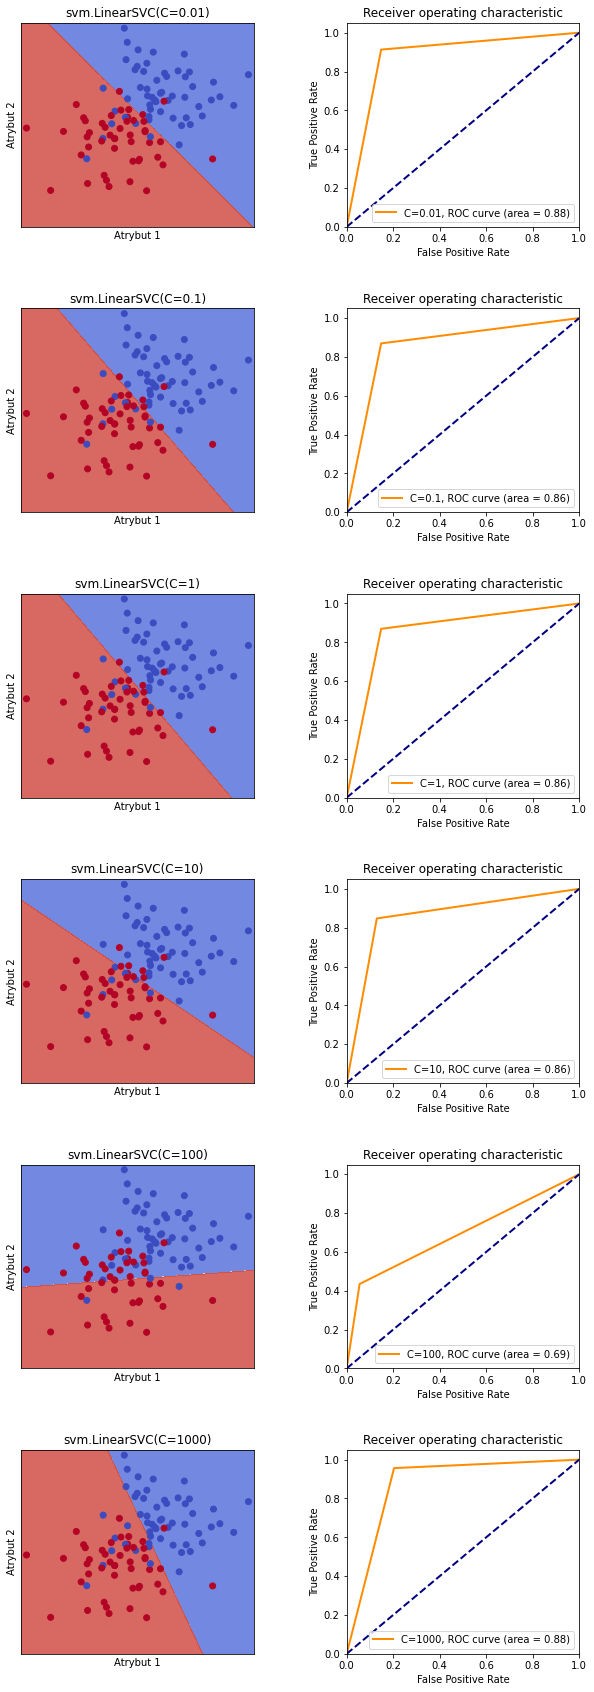

Text(0, 0.5, 'Powierzchnia krzywej ROC')

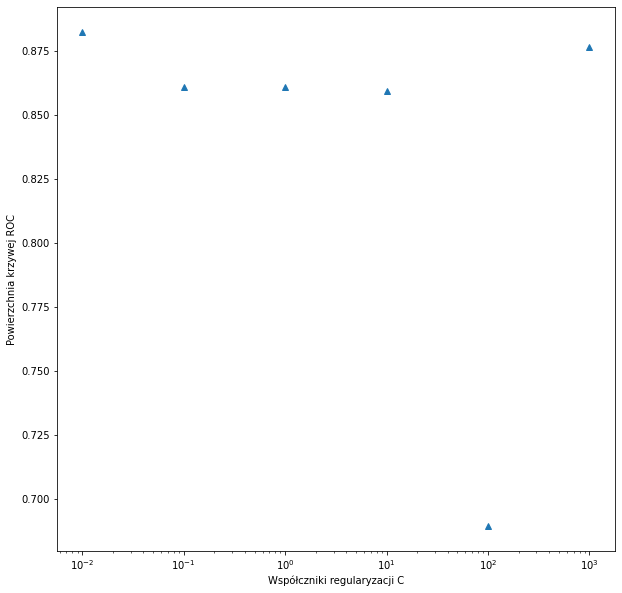

In [167]:
C_list = [0.01, 0.1, 1, 10, 100, 1000]
C_len = len(C_list)
roc_hist = np.empty(C_len)

plt.figure(figsize=(10,30))

for i, C in enumerate(C_list):
    classifier = svm.LinearSVC(C=C).fit(X_train, y_train)
    y_score = classifier.predict(X_test)
    
    plt.subplot(C_len, 2, 2*i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(f"svm.LinearSVC(C={C})")

    plt.subplot(C_len, 2, 2*i + 2)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(1):
        fpr[j], tpr[j], _ = roc_curve(y_test, y_score)
        roc_auc[j] = auc(fpr[j], tpr[j])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    lw = 2
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.plot(fpr[0], tpr[0], color='darkorange',
             lw=lw, label=f'C={C}, ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    roc_hist[i] = roc_auc[0]
    
plt.show()

plt.figure(figsize=(10,10))
plt.plot(C_list, roc_hist, '^')
plt.xscale('log')
plt.xlabel('Współczniki regularyzacji C')
plt.ylabel('Powierzchnia krzywej ROC')

Z czego przeczytałem w internecie funkcja linearSVM minimalizuje kwadrat błędów dopasowanej prostej -> w rezultacie minimalizowany jest bias co nie jest SVM.  
Matematycznie różnice można zapisać:  
* SVC :      1/2||w||^2 + C SUM xi_i  
* LinearSVC: 1/2||[w b]||^2 + C SUM xi_i  

Gdybym miał wybierać współczynik regularyzacji C, wybrałbym 1e-2, ponieważ dla niego uzyskujemy najabrdziej stablilne rozwiązanie - za każdym razem jak wyznaczam za zależność powierzchni krzywej ROC od współczynika regularyzacji C to uzyskuje różne wyniki, a dla 1e-2 są najbardziej stabline.

### Zadanie 3

Dla klasyfikatorów SVM z jądrem wielomianowym dokonaj doboru stopnia wielomianu i współczynnika regularyzacji C. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. 

<ipython-input-168-682a11613494>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
<ipython-input-168-682a11613494>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
<ipython-input-168-682a11613494>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X

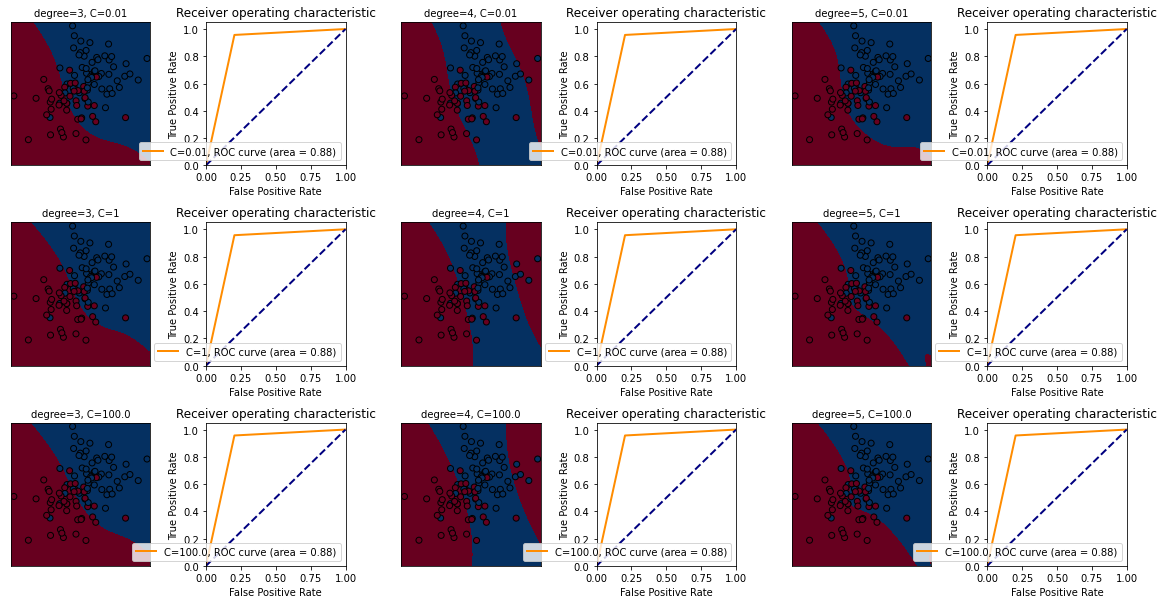

In [168]:
C_range = [1e-31e-2, 1, 1e2]
degree_range = [3, 4, 5]
classifiers = []
for C in C_range:
    for degree in degree_range:
        clf = svm.SVC(kernel='poly', degree=degree, C=C)
        clf.fit(X_train, y_train)
        classifiers.append((C, degree, clf))
        
plt.figure(figsize=(20, 10))
for (k, (C, degree, clf)) in enumerate(classifiers):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(degree_range)*2, k*2 + 1)
    plt.title(f"degree={degree}, C={C}", size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    
    
    plt.subplot(len(C_range), len(degree_range)*2, k*2 + 2)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(1):
        fpr[j], tpr[j], _ = roc_curve(y_test, y_score)
        roc_auc[j] = auc(fpr[j], tpr[j])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    lw = 2
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.plot(fpr[0], tpr[0], color='darkorange',
             lw=lw, label=f'C={C}, ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

Jak widać, dla różnych parametrów uzyskaliśym, różne granice decyzjne oraz taki sam poziom błędu. Gdybym miał wybierać, wybrał bym nieparzysty stopień wielomianu.

### Zadanie 4

Dla klasyfikatorów SVM z jądrem Gaussa dokonaj doboru współczynnika wariancji. Pokaż granice decyzyjne dla kilku wybranych współczynników oraz wykreśl krzywe ROC. 

<ipython-input-162-2dd681c3e811>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
<ipython-input-162-2dd681c3e811>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
<ipython-input-162-2dd681c3e811>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X

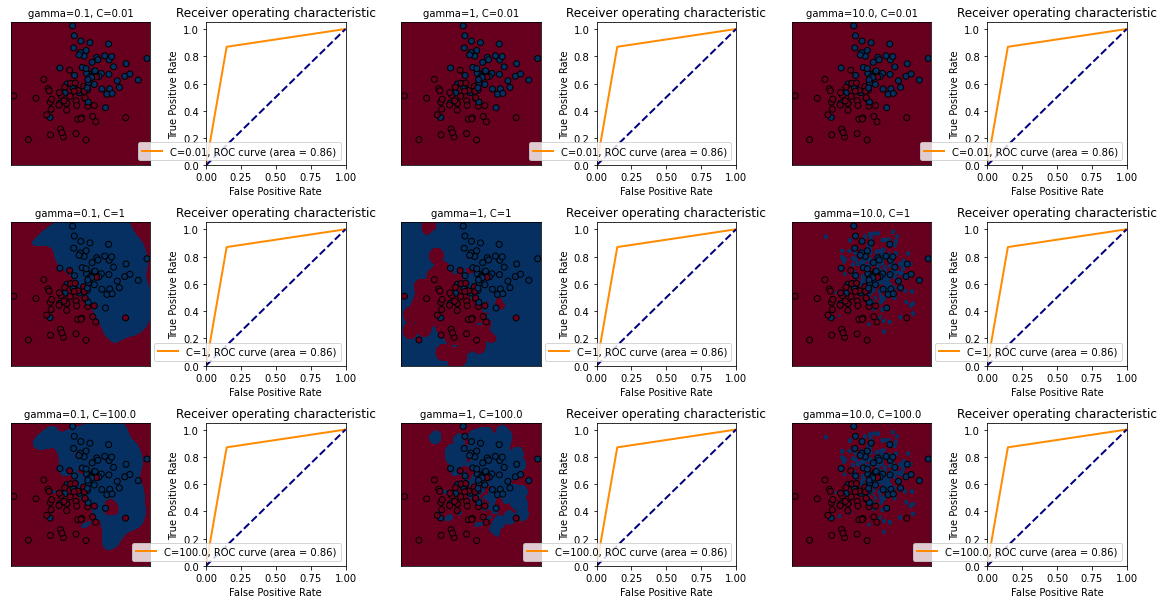

In [162]:
C_range = [1e-2, 1, 1e2]
gamma_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_range:
    for gamma in gamma_range:
        clf = svm.SVC(kernel='rbf', gamma=gamma, C=C)
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))
        
plt.figure(figsize=(20, 10))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(degree_range)*2, k*2 + 1)
    plt.title(f"gamma={gamma}, C={C}", size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    
    
    plt.subplot(len(C_range), len(degree_range)*2, k*2 + 2)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(1):
        fpr[j], tpr[j], _ = roc_curve(y_test, y_score)
        roc_auc[j] = auc(fpr[j], tpr[j])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    lw = 2
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.plot(fpr[0], tpr[0], color='darkorange',
             lw=lw, label=f'C={C}, ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

Jak widać, dla różnych parametrów uzyskaliśym, różne granice decyzjne oraz taki sam poziom błędu. Najbardziej sensowne wydają rezultaty dla gamma = 0.1 oraz współczynika regularyzacji C równiego 1 oraz 100.